---

##  Dataset Overview – `ai_job_dataset.csv`

This dataset contains detailed information about **15,000 AI-related job postings** from various companies and locations worldwide. The data reflects key factors that influence job types, compensation, and role requirements in the AI, ML, and Data Science domains.

---

###  Dataset Dimensions

* **Rows (job listings):** 15,000
* **Columns (features):** 19
* **Missing Values:** None

---

##  Column-by-Column Feature Descriptions

| Feature Name             | Description                                                                     |
| ------------------------ | ------------------------------------------------------------------------------- |
| `job_id`                 | Unique identifier for each job posting                                          |
| `job_title`              | Title of the job (e.g., "AI Engineer", "NLP Scientist")                         |
| `salary_usd`             | Salary for the role converted into USD                                          |
| `salary_currency`        | Original salary currency before conversion                                      |
| `experience_level`       | Required experience level: EN (Entry), MI (Mid), SE (Senior), EX (Exec)         |
| `employment_type`        | Type of contract: FT (Full-time), PT (Part-time), FL (Freelance), CT (Contract) |
| `company_location`       | Country where the hiring company is located                                     |
| `company_size`           | Size of the company: S (Small), M (Medium), L (Large)                           |
| `employee_residence`     | Country where the employee is expected to reside                                |
| `remote_ratio`           | Degree of remote work: 0 (on-site), 50 (hybrid), 100 (fully remote)             |
| `required_skills`        | List of technical skills required for the job (comma-separated)                 |
| `education_required`     | Minimum education required (e.g., Bachelor, Master, PhD, Associate)             |
| `years_experience`       | Number of years of experience required                                          |
| `industry`               | Industry sector of the job (e.g., Finance, Media, Tech, Healthcare)             |
| `posting_date`           | Date the job posting went live                                                  |
| `application_deadline`   | Final date to apply for the job                                                 |
| `job_description_length` | Length of the full job description in number of characters                      |
| `benefits_score`         | Quantified score of benefits/perks offered (e.g., insurance, equity, etc.)      |
| `company_name`           | Name of the company posting the job                                             |

---

# Importing Required Library

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Dataset Loading and Initial Overview

## Load the dataset

In [2]:
file_path = "/content/ai_job_dataset.csv"
df = pd.read_csv(file_path)

## Dataset shape

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (15000, 19)


## Display first few rows

In [4]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

**Observation**
- job_id not useful
- job_title can be target
- Salary_usd will be main target
- salary_currency not useful
- experience level - good cat feature
- employment type - good cat feature
- company_location - might affect salary so, good cat feature
- company_size - not useful but can fact-check for No.of Job posts vs Employees in each company
- employee_residence - not useful but can predict availability of jobs outside country
- remote_ratio - useful, can fact check by comparing employee_residence and company_location
- required_skills - good cat feature with count
- education_required - good cat feature
- years_experience - related to experience_level, good num feature
- industry - average cat feature
- posting_date - useful for time series
- application_deadline - related to posting_date
- job_description_length - useful, if you use AI to analysis all the description
- benefits_score - can be target
- company_name - cat feature

In [7]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


## Check for missing values

In [9]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


## Column data types

In [10]:
print("\nColumn Data Types:")
print(df.dtypes)


Column Data Types:
job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object


# STEP 2: Data Cleaning & Feature Preparation

## Convert date columns to datetime format

In [11]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

## Normalize text columns: remove leading/trailing whitespace and lowercase

In [12]:
categorical_cols = [
    'job_title', 'salary_currency', 'experience_level', 'employment_type',
    'company_location', 'company_size', 'employee_residence',
    'education_required', 'industry', 'company_name'
]

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()


## Display unique values in key categorical columns

In [13]:
print("Unique values in 'experience_level':", df['experience_level'].unique())
print("Unique values in 'employment_type':", df['employment_type'].unique())
print("Unique values in 'company_size':", df['company_size'].unique())
print("Unique values in 'remote_ratio':", df['remote_ratio'].unique())

Unique values in 'experience_level': ['se' 'en' 'mi' 'ex']
Unique values in 'employment_type': ['ct' 'fl' 'pt' 'ft']
Unique values in 'company_size': ['m' 'l' 's']
Unique values in 'remote_ratio': [ 50 100   0]


# STEP 3: Exploratory Data Analysis (EDA)

## Set style

In [22]:
sns.set(style="whitegrid",palette='viridis')
plt.rcParams["figure.figsize"] = (12, 6)


## 1. Salary Distribution

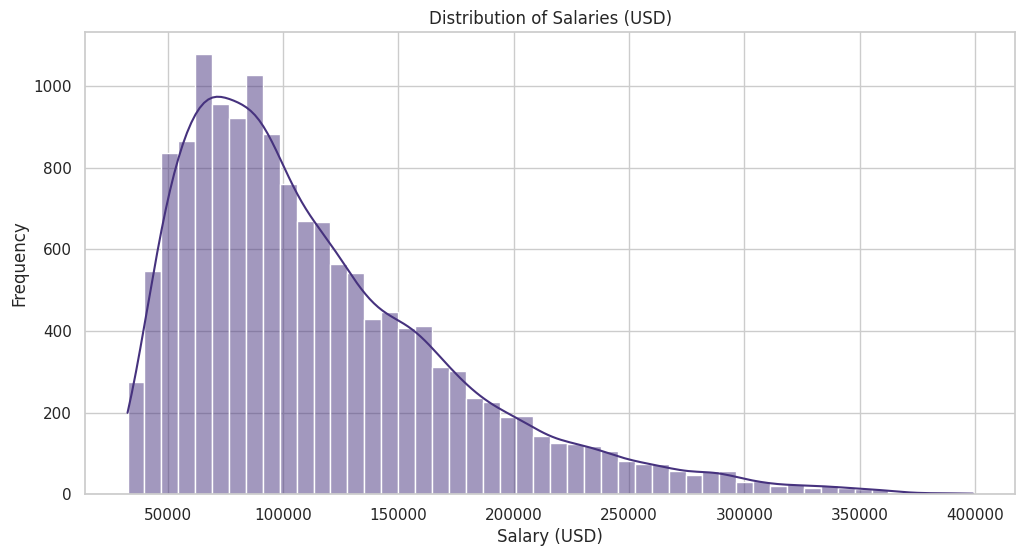

In [23]:
plt.figure()
sns.histplot(df['salary_usd'], bins=50, kde=True)
plt.title("Distribution of Salaries (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

## 2. Salary by Experience Level

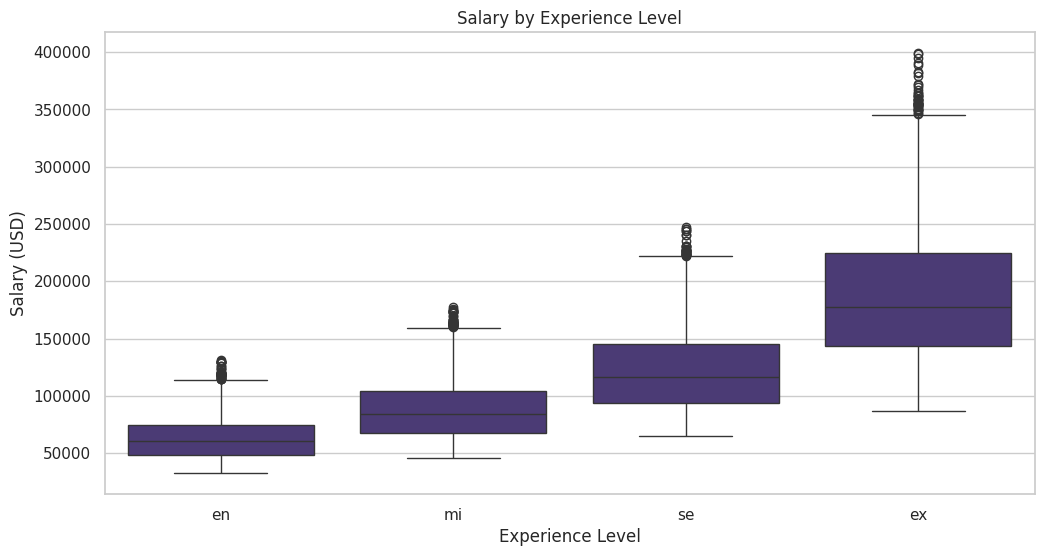

In [24]:
plt.figure()
sns.boxplot(x='experience_level', y='salary_usd', data=df, order=['en', 'mi', 'se', 'ex'])
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

## 3. Salary by Employment Type

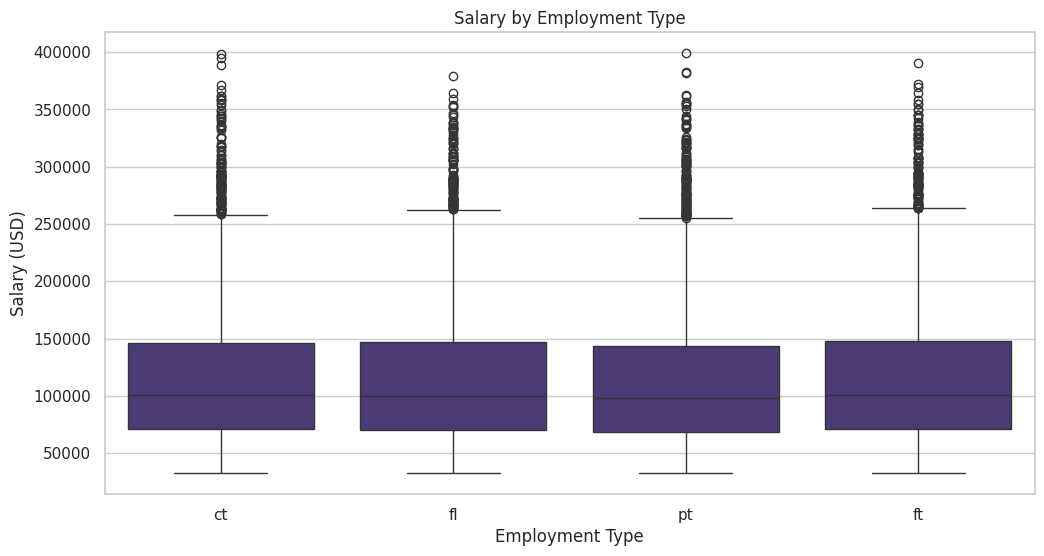

In [25]:
plt.figure()
sns.boxplot(x='employment_type', y='salary_usd', data=df)
plt.title("Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary (USD)")
plt.show()

## 4. Salary by Remote Ratio

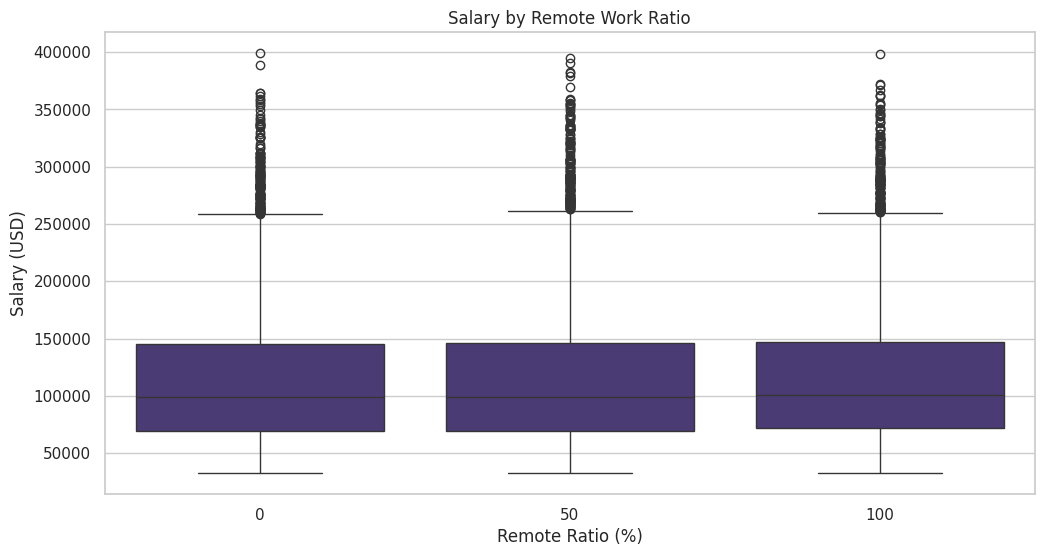

In [26]:
plt.figure()
sns.boxplot(x='remote_ratio', y='salary_usd', data=df)
plt.title("Salary by Remote Work Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()

## 5. Average Salary by Company Size (Fixed)

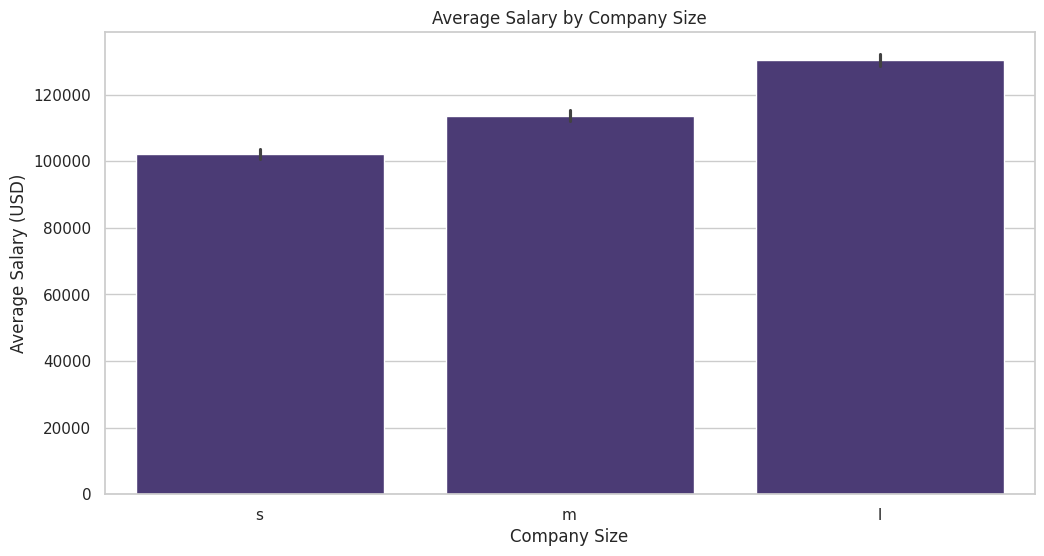

In [27]:
plt.figure()
sns.barplot(x='company_size', y='salary_usd', data=df, estimator=np.mean, order=['s', 'm', 'l'])
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.show()

## 6. Top 10 Industries by Job Count

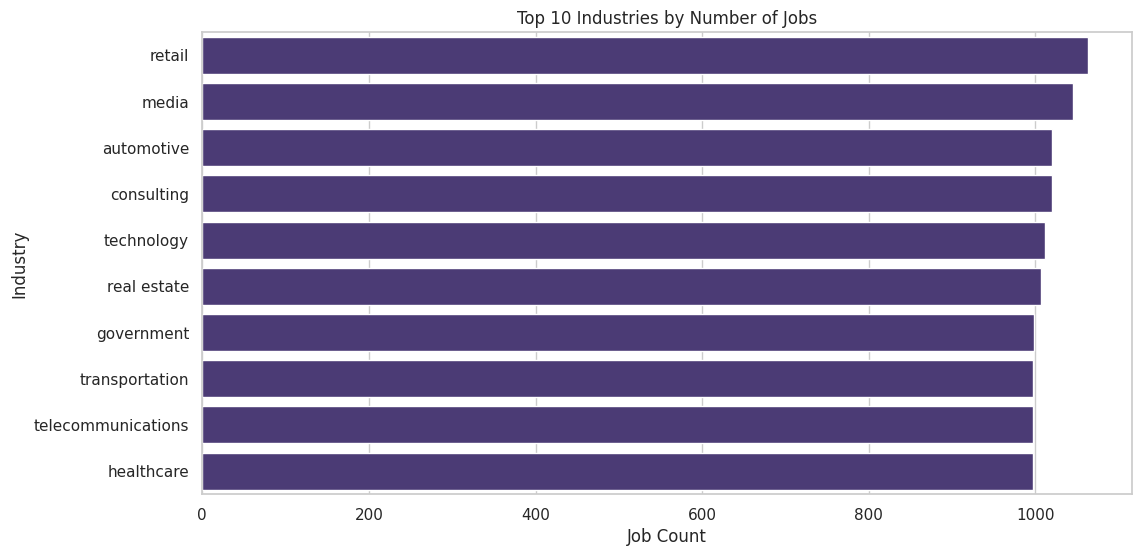

In [28]:
plt.figure()
top_industries = df['industry'].value_counts().head(10)
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top 10 Industries by Number of Jobs")
plt.xlabel("Job Count")
plt.ylabel("Industry")
plt.show()

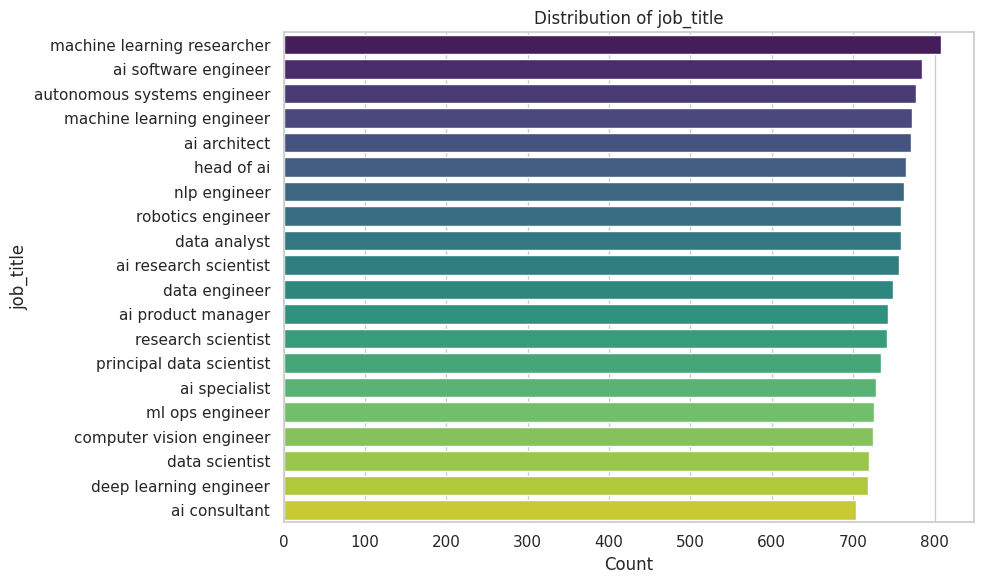

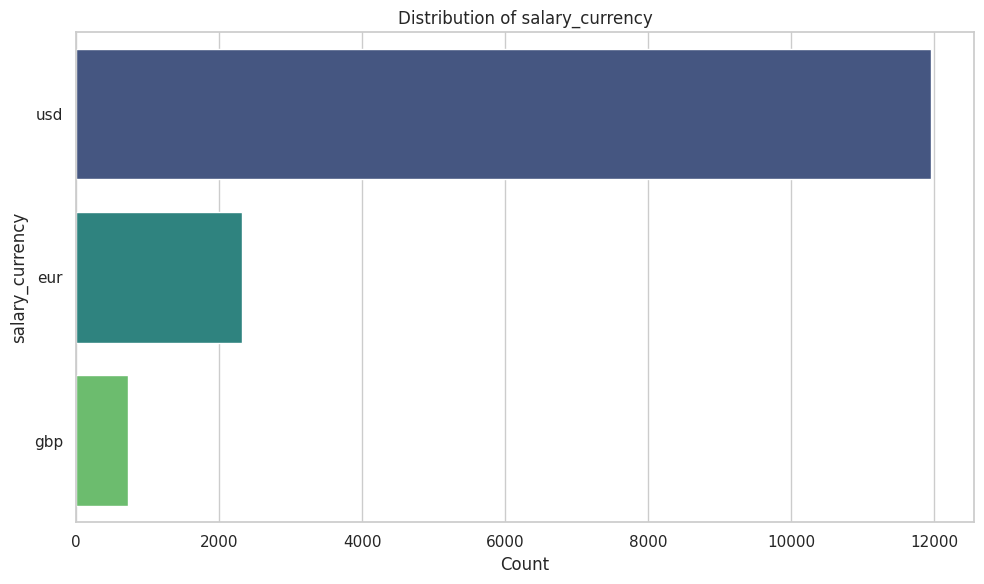

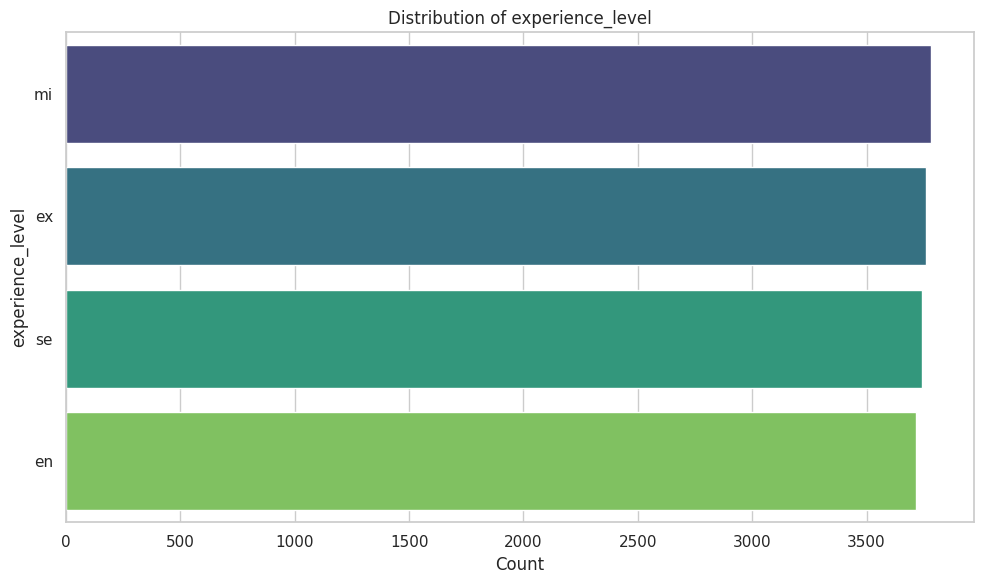

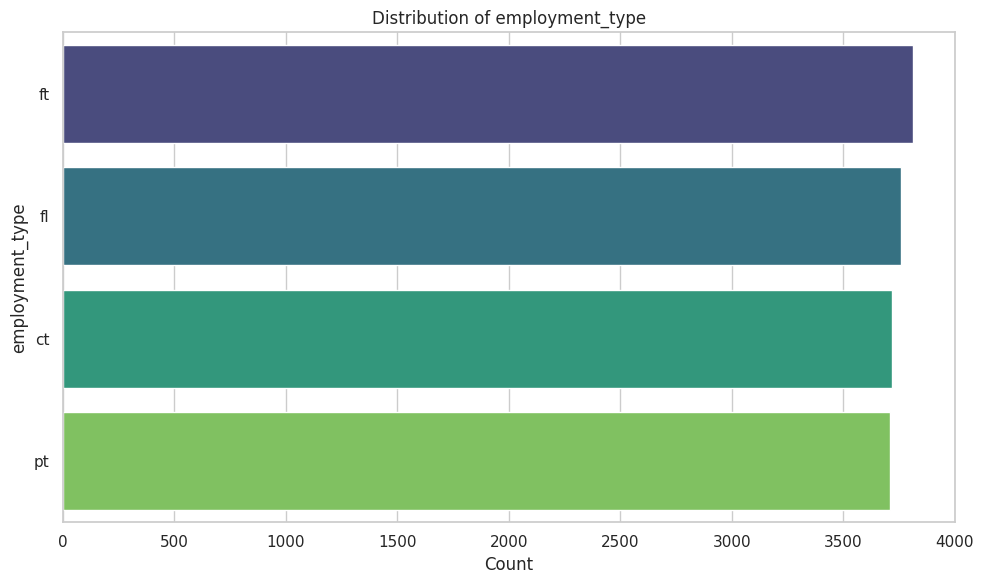

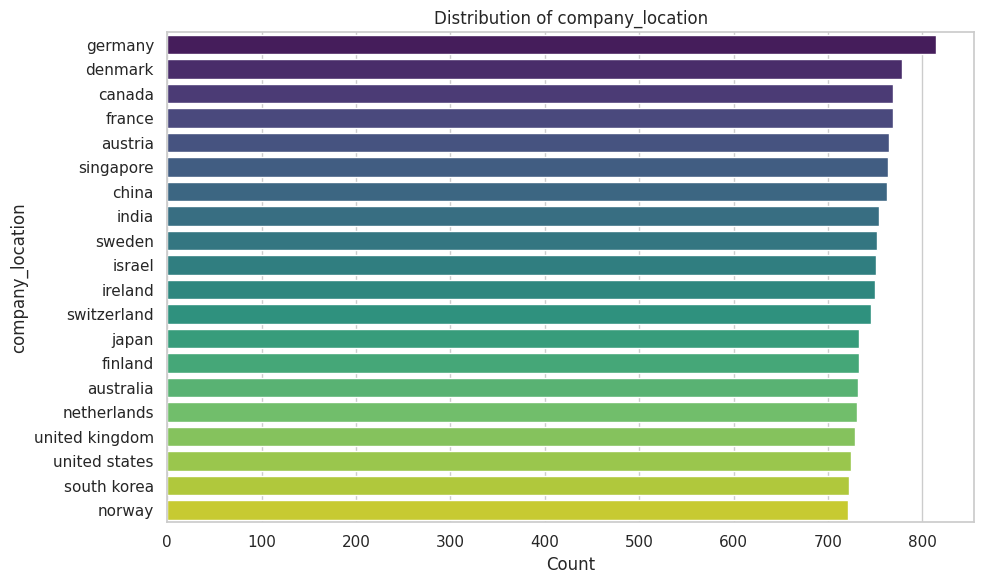

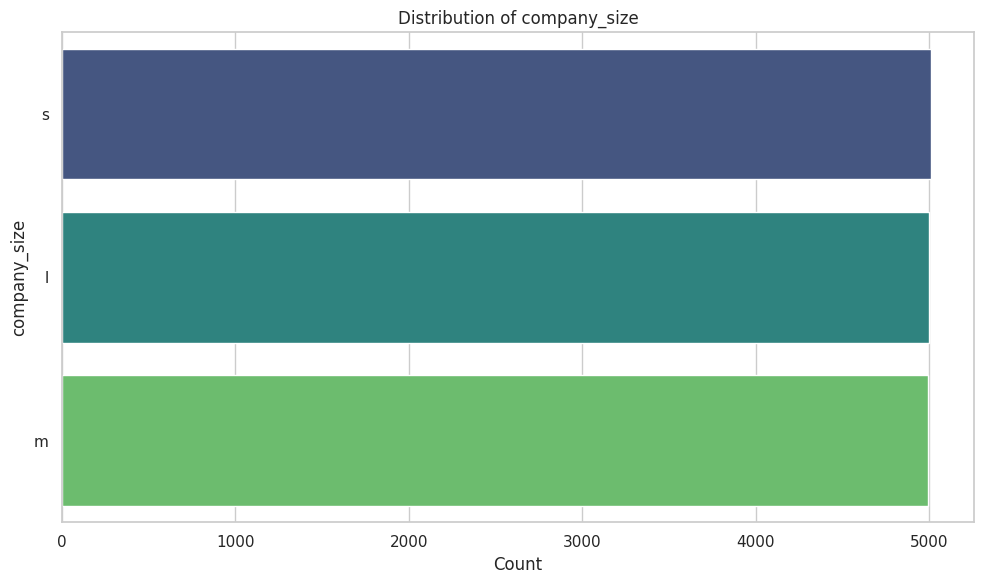

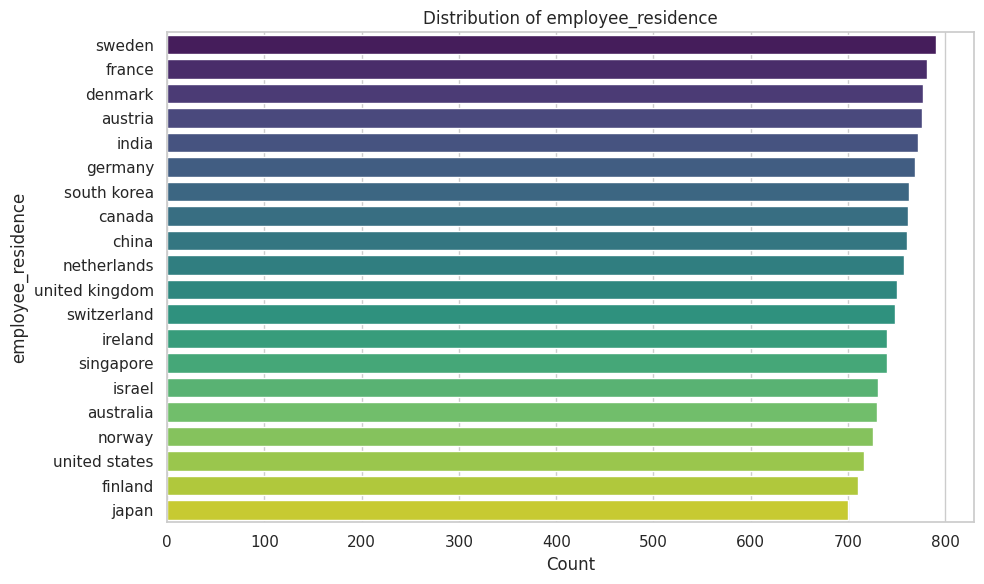

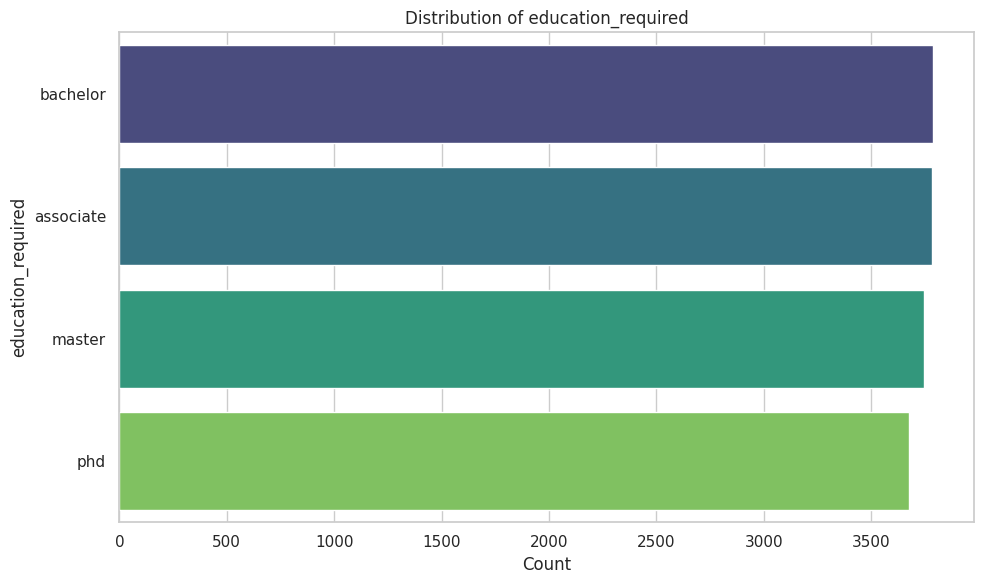

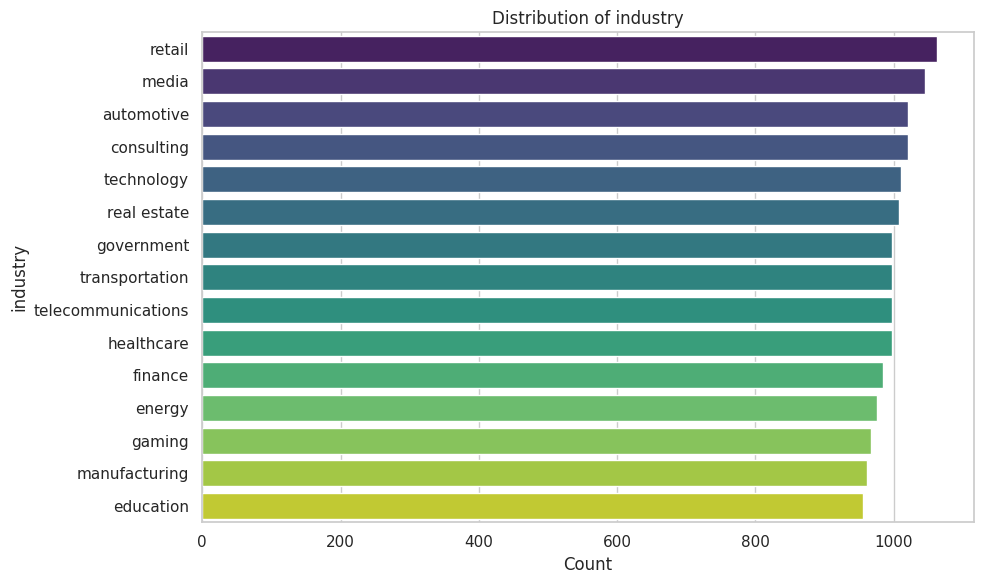

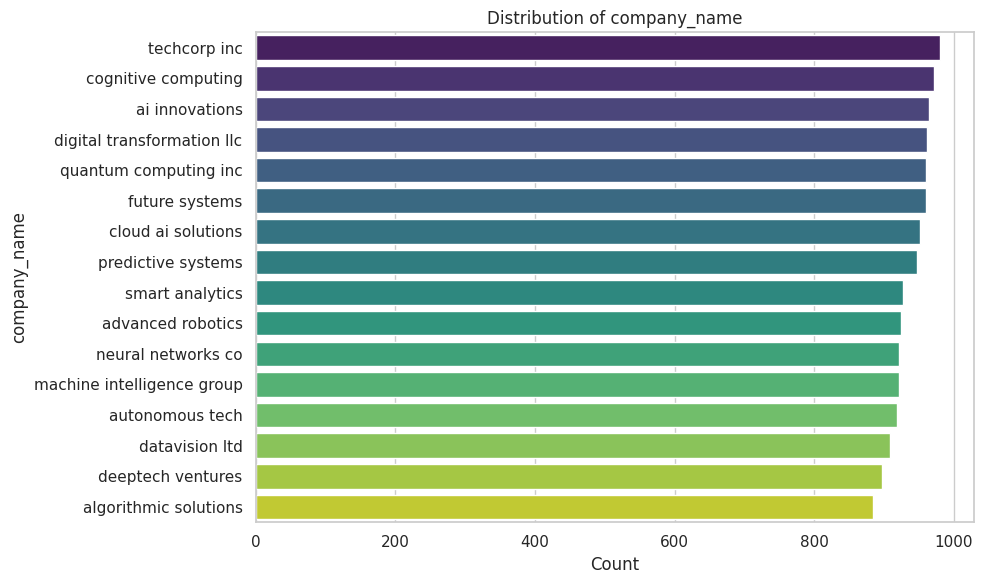

In [30]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Bivarate Analysis


Box Plots: Categorical Features vs. Salary USD


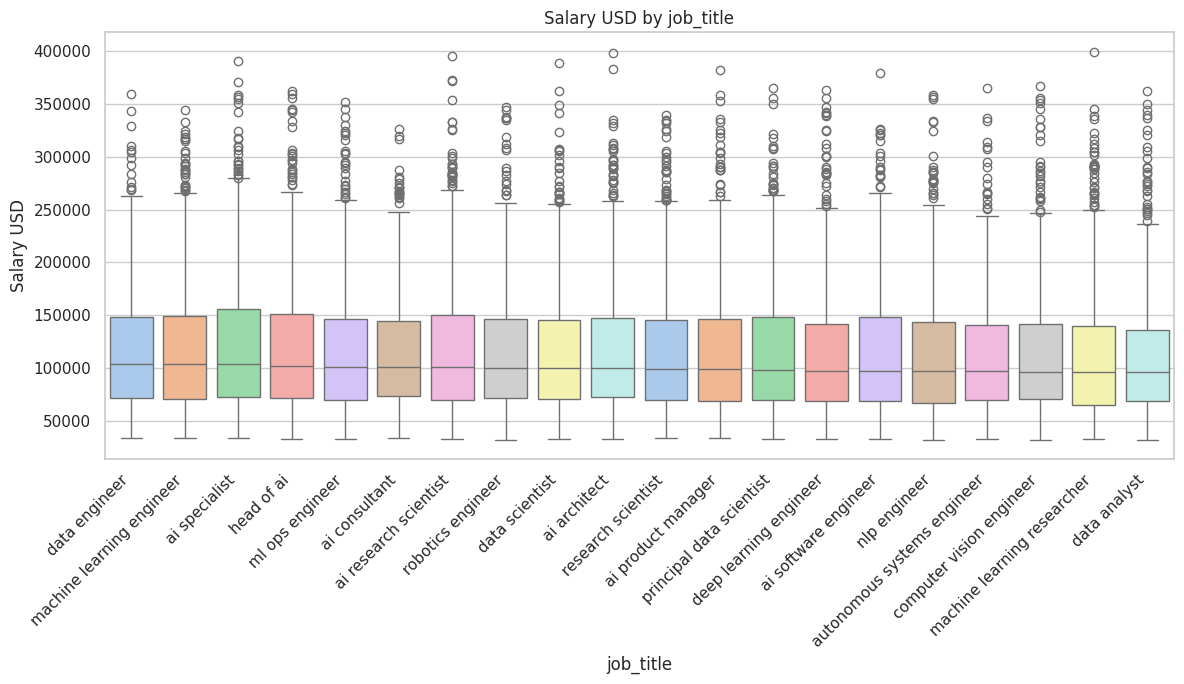

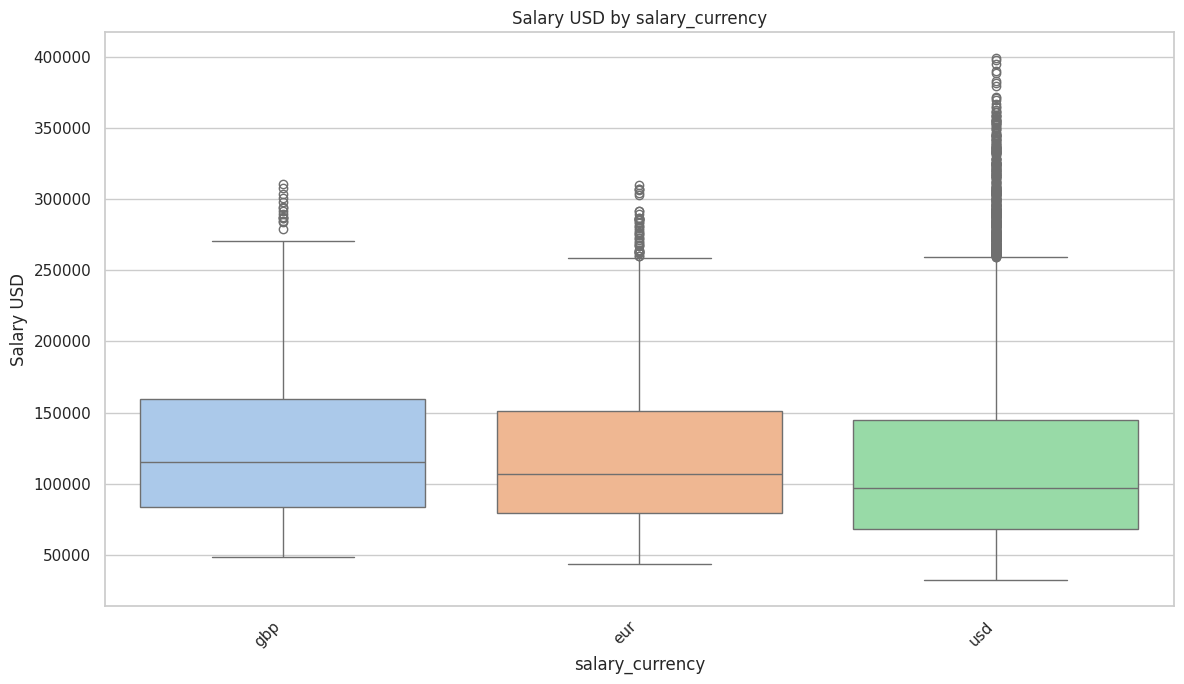

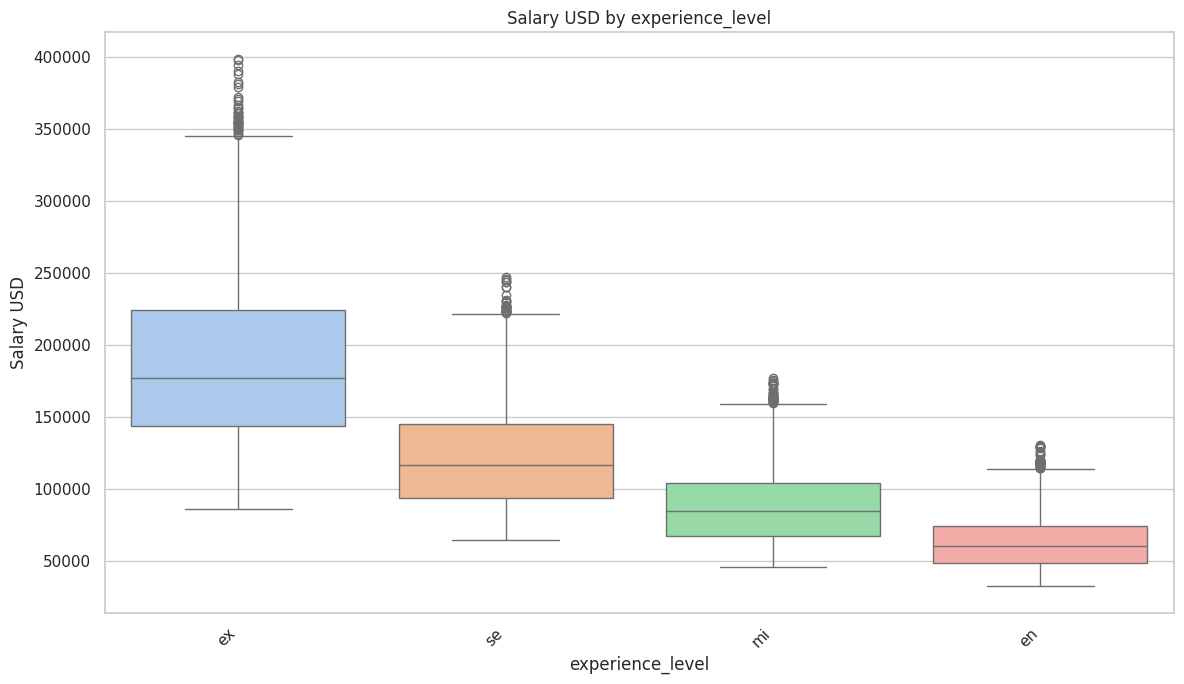

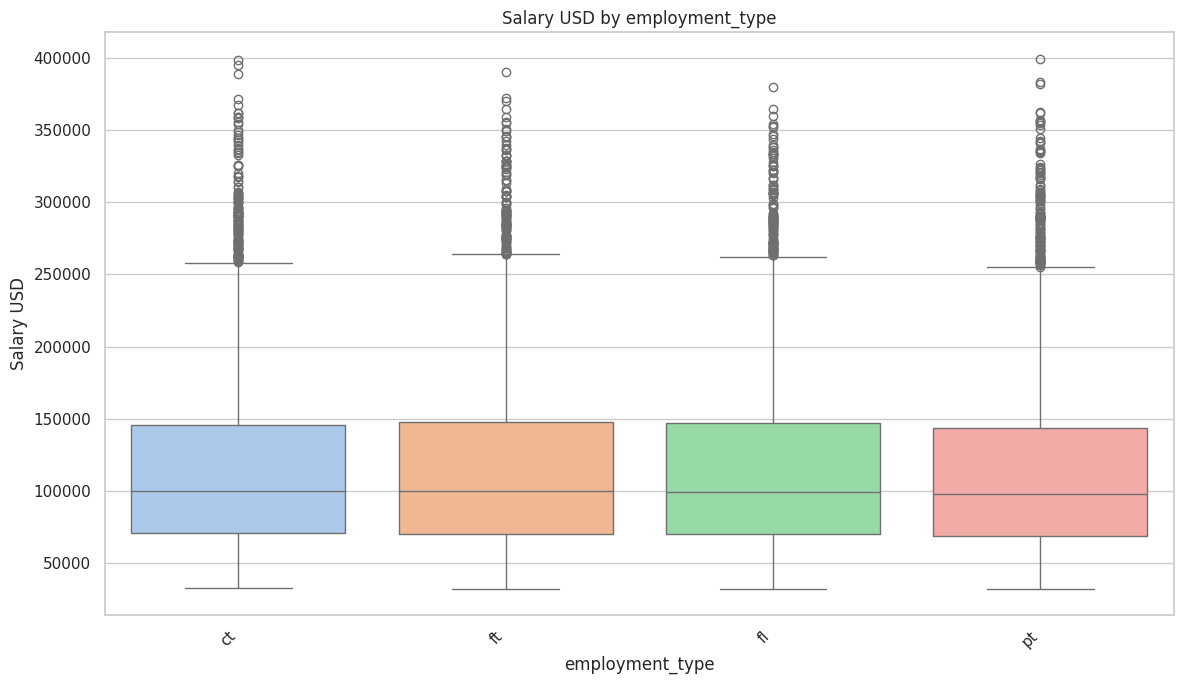

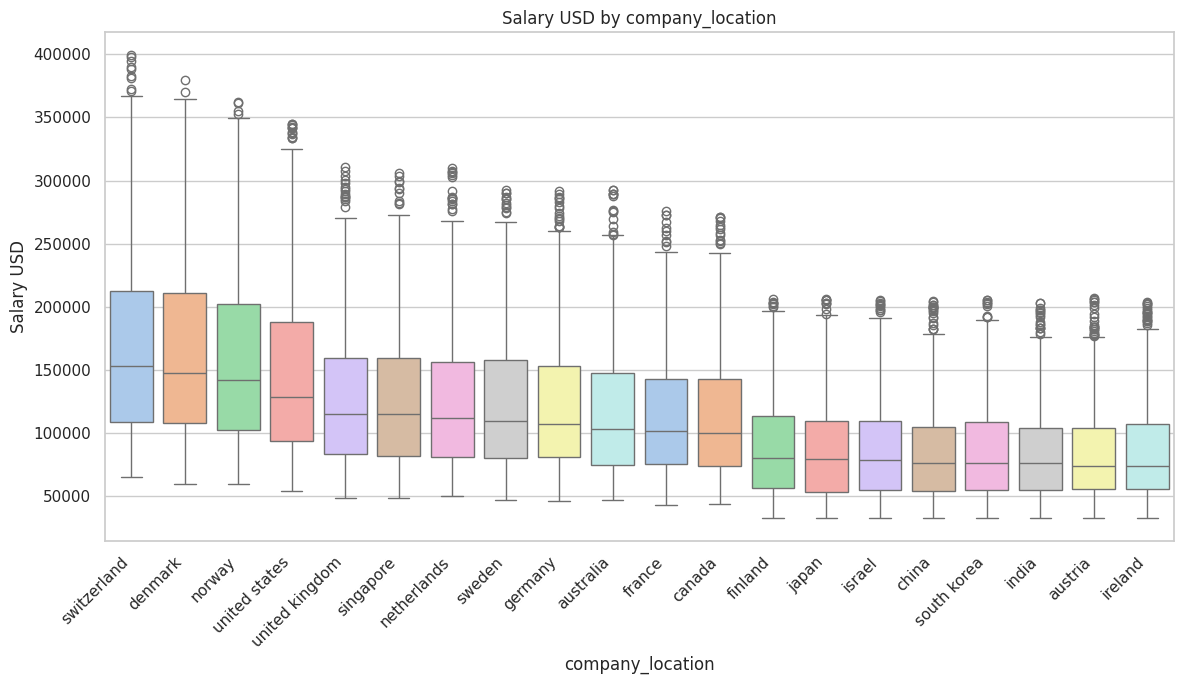

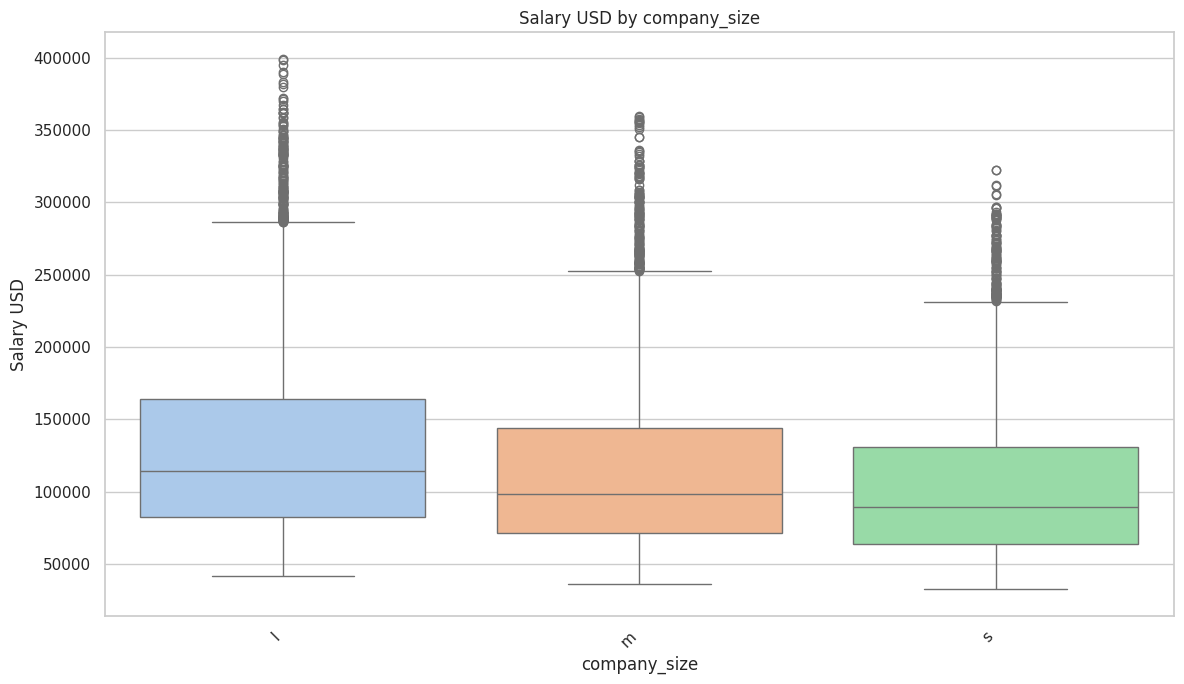

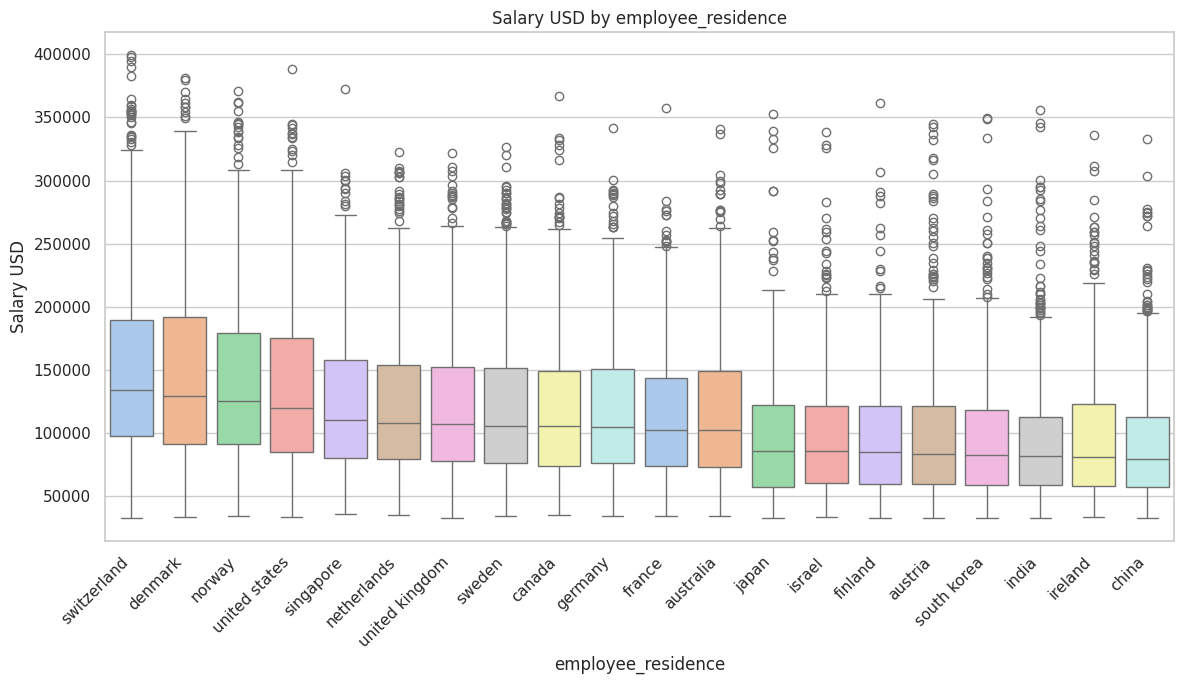

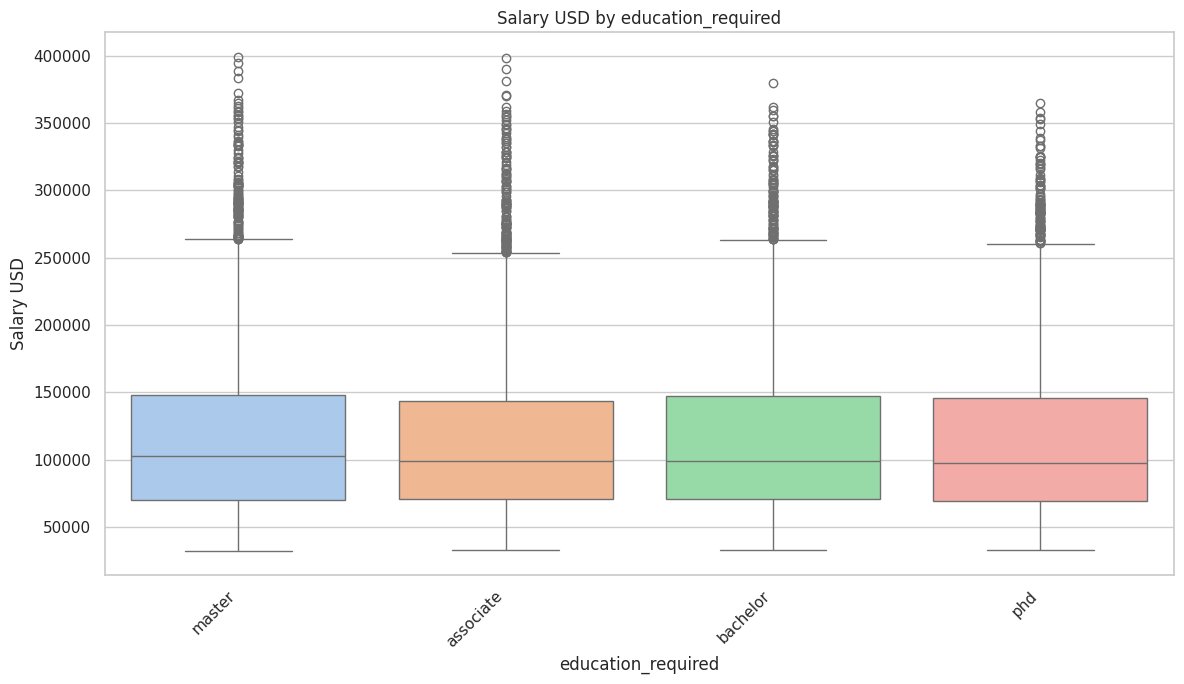

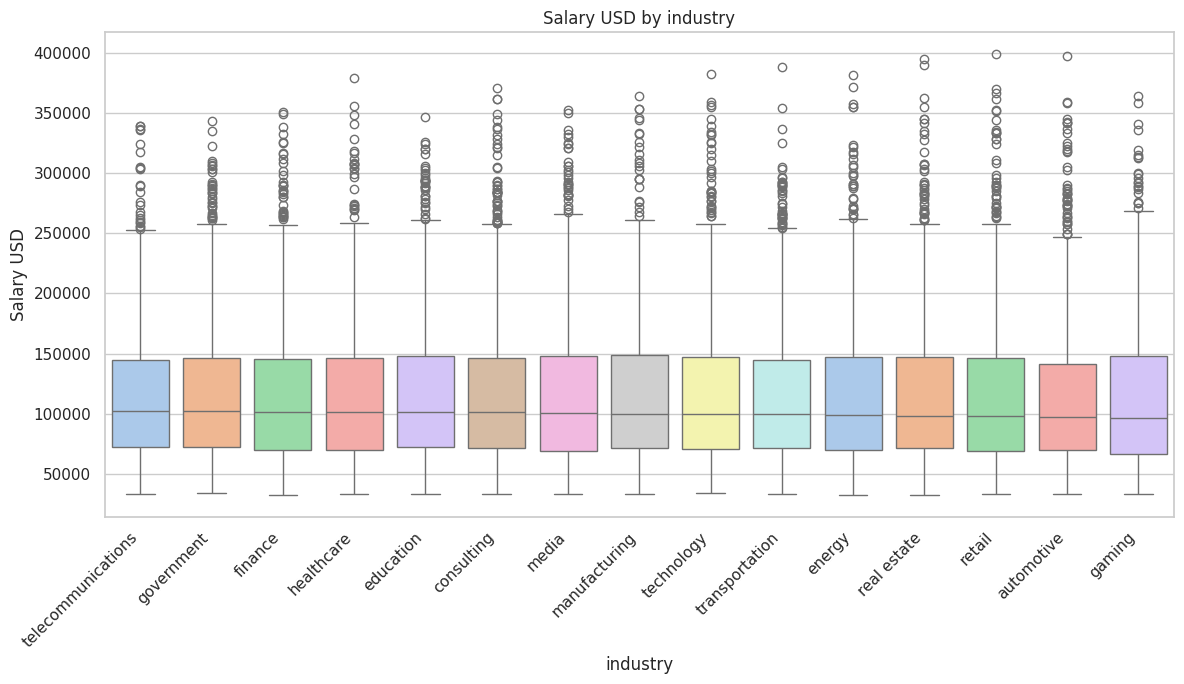

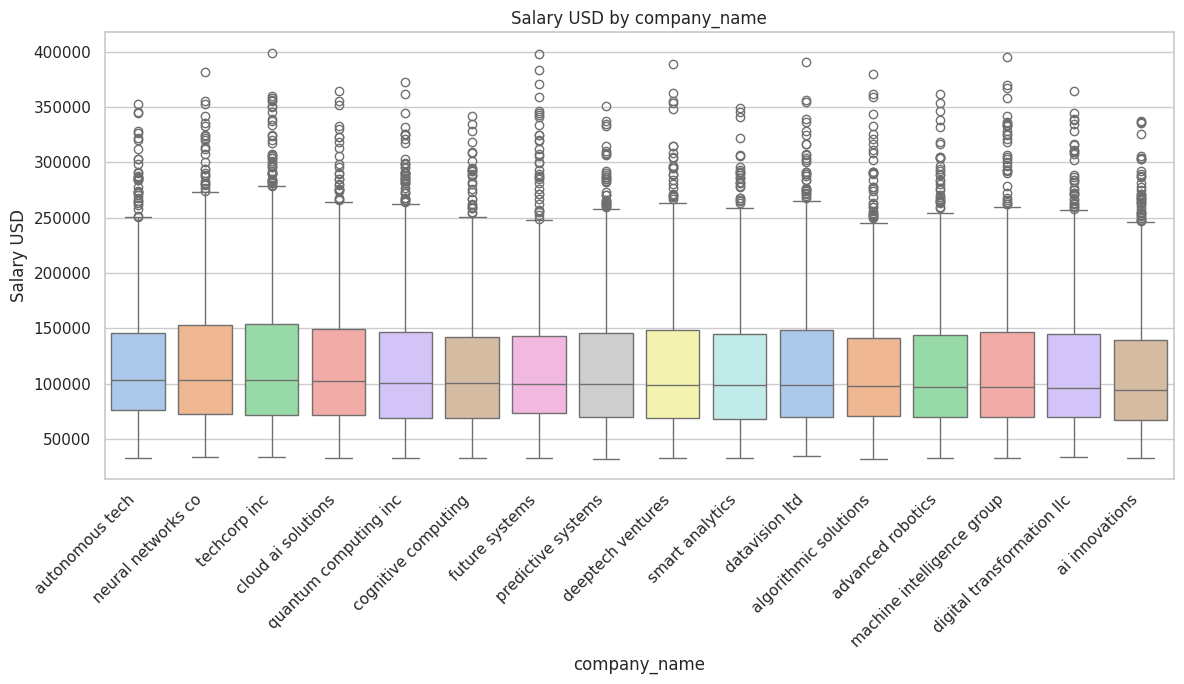


Bivariate Analysis: Remote Work Patterns


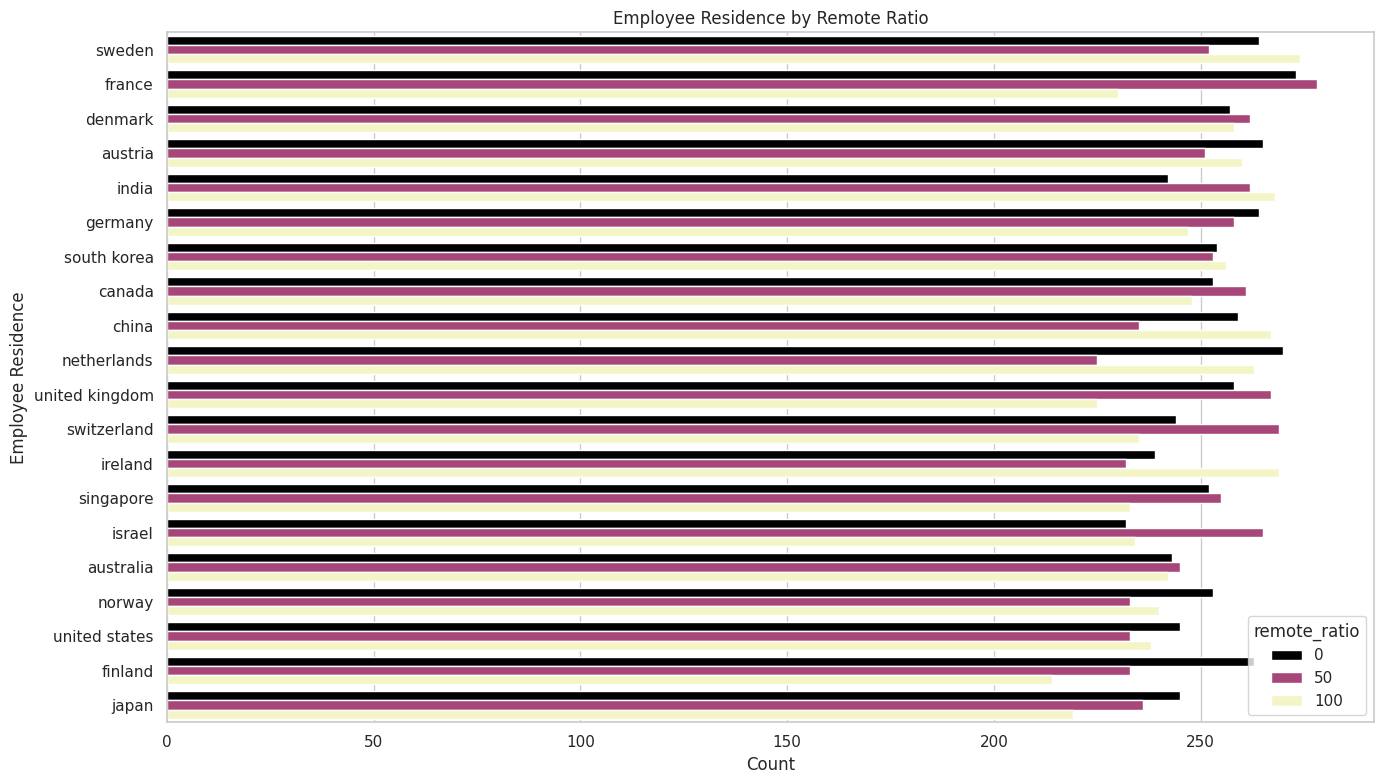

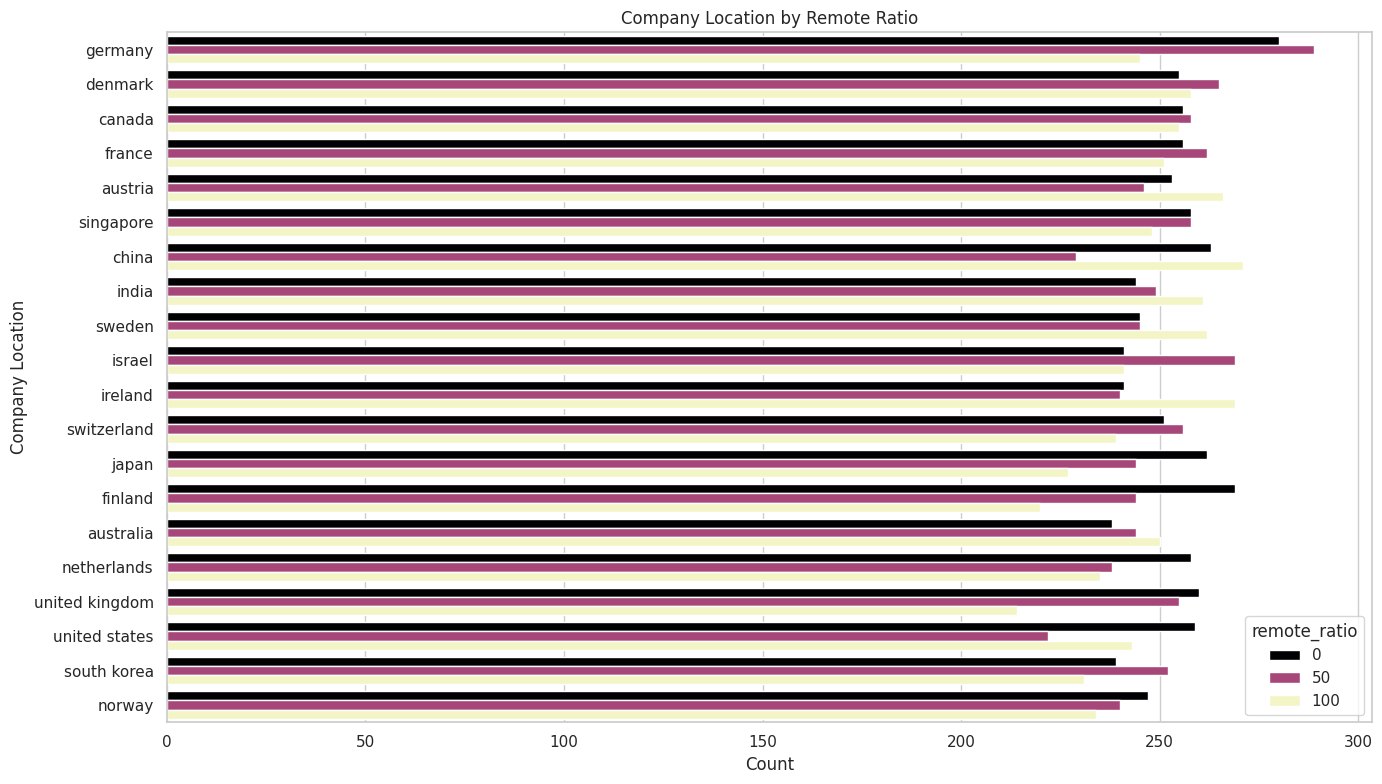

In [34]:


print("\nBox Plots: Categorical Features vs. Salary USD")
for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=col, y='salary_usd', palette='pastel', order=df.groupby(col)['salary_usd'].median().sort_values(ascending=False).index)
    plt.title(f'Salary USD by {col}')
    plt.xlabel(col)
    plt.ylabel('Salary USD')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\nBivariate Analysis: Remote Work Patterns")
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='employee_residence', hue='remote_ratio', palette='magma', order=df['employee_residence'].value_counts().index)
plt.title('Employee Residence by Remote Ratio')
plt.xlabel('Count')
plt.ylabel('Employee Residence')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='company_location', hue='remote_ratio', palette='magma', order=df['company_location'].value_counts().index)
plt.title('Company Location by Remote Ratio')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()



**Observation**
- 80% salaries is between 50k and 200k so, its right-skewed salary distribution
- so Made log_salary for it
- outliers - Need Normalization or Log-Transform

## STEP 4: Feature Engineering and ML Preparation

In [29]:
from sklearn.preprocessing import LabelEncoder

## Create a copy of the original dataset for modeling

In [35]:
df_model = df.copy()

## Drop columns that are not useful for modeling

In [36]:
df_model.drop(['job_id', 'posting_date', 'application_deadline', 'company_name'], axis=1, inplace=True)

## Define categorical columns to encode

In [37]:
categorical_features = [
    'job_title', 'salary_currency', 'experience_level', 'employment_type',
    'company_location', 'company_size', 'employee_residence',
    'education_required', 'industry'
]

## Apply Label Encoding to categorical features

In [38]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

## Separate features and target for salary prediction (regression)

In [39]:
X_reg = df_model.drop('salary_usd', axis=1)
y_reg = df_model['salary_usd']

## Display final shapes of feature matrix and target vector

In [40]:
print("Feature matrix shape:", X_reg.shape)
print("Target vector shape:", y_reg.shape)

Feature matrix shape: (15000, 14)
Target vector shape: (15000,)


# STEP 5: Regression Modeling & Model Comparison

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Remove 'required_skills' for now (text-based)

In [42]:
X = df_model.drop(['salary_usd', 'required_skills'], axis=1)
y = df_model['salary_usd']

## Train-Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)


## Feature Scaling

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define Models

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=537)

}


## Store results

In [47]:
results = []

## Train & Evaluate Each Model

In [48]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })


## Show results

In [49]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
2,XGBoost,14831.872070,4.289064e+08,20710.056301,0.876160
1,Random Forest,15076.599983,4.471929e+08,21146.935035,0.870880
0,Linear Regression,26801.231187,1.371426e+09,37032.772831,0.604022


## STEP 6: Visual Comparison of Regression Models

In [50]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="R2 Score", ascending=False)

## Plot R² Score

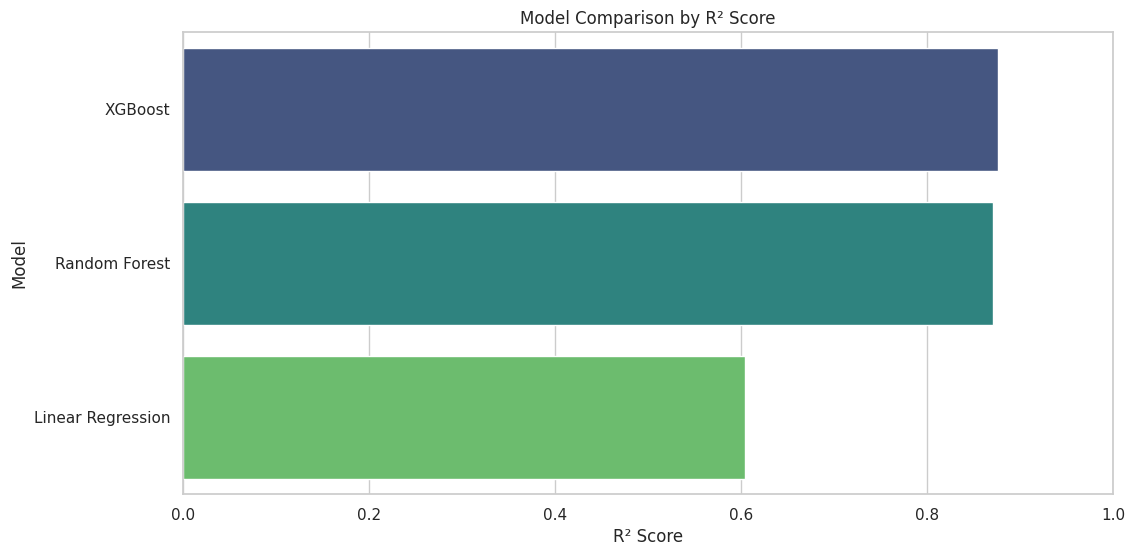

In [53]:
plt.figure()
sns.barplot(x="R2 Score", y="Model", data=results_df_sorted, palette="viridis")
plt.title("Model Comparison by R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

## Plot MAE

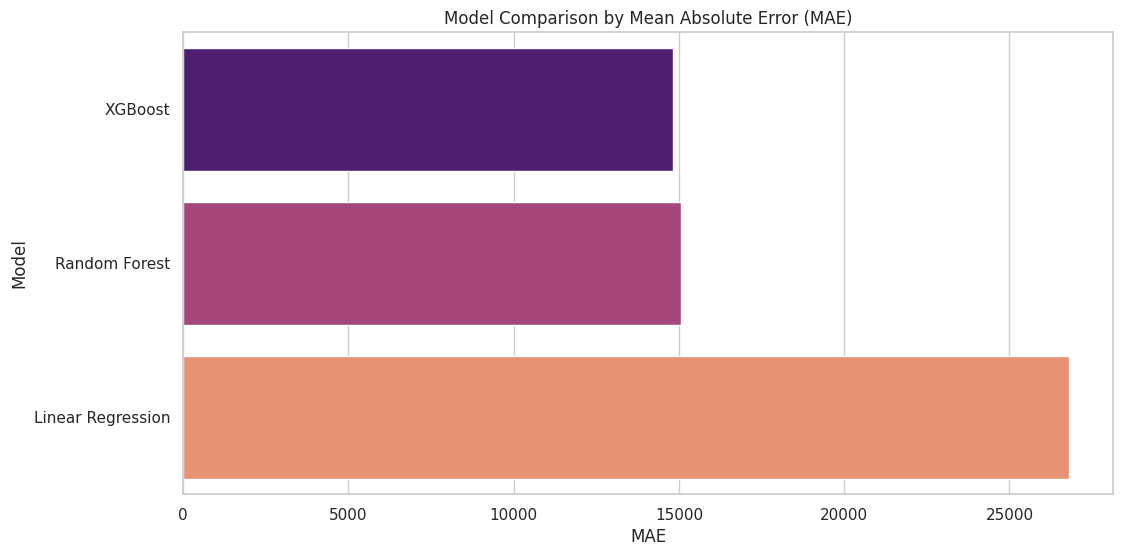

In [54]:
plt.figure()
sns.barplot(x="MAE", y="Model", data=results_df_sorted, palette="magma")
plt.title("Model Comparison by Mean Absolute Error (MAE)")
plt.xlabel("MAE")
plt.ylabel("Model")
plt.show()

## Plot RMSE

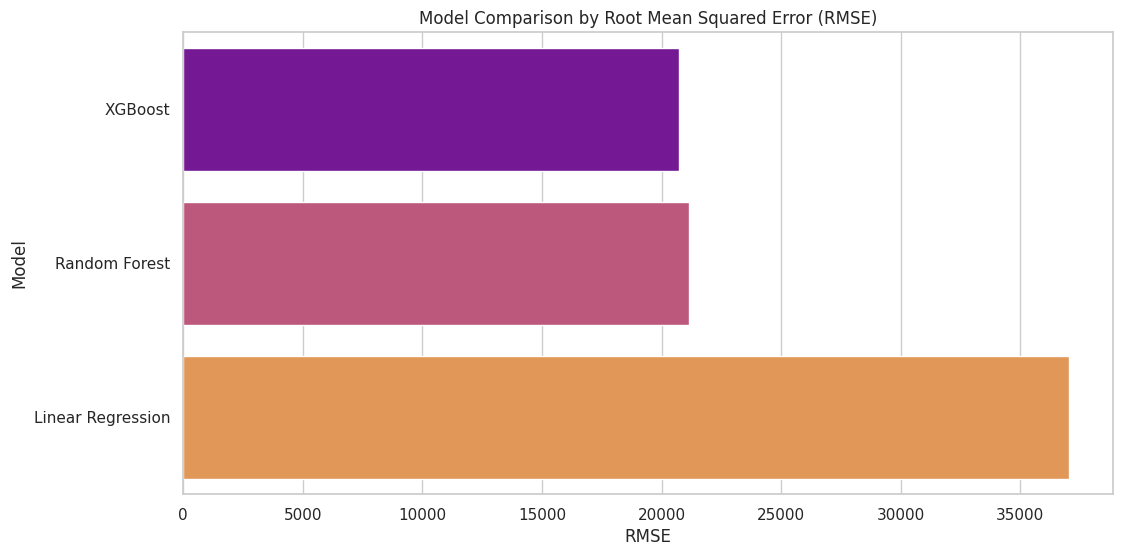

In [55]:
plt.figure()
sns.barplot(x="RMSE", y="Model", data=results_df_sorted, palette="plasma")
plt.title("Model Comparison by Root Mean Squared Error (RMSE)")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()

# STEP 7: Deep Learning Regression Model with Keras

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Define the model

In [57]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

## Compile the model

In [58]:
model.compile(optimizer='adam', loss='mse')

## Train the model

In [59]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0
)


## Predict and evaluate

In [60]:
y_pred_dl = model.predict(X_test_scaled).flatten()

mae_dl = mean_absolute_error(y_test, y_pred_dl)
mse_dl = mean_squared_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
r2_dl = r2_score(y_test, y_pred_dl)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Append to results

In [61]:
results.append({
    "Model": "Deep Learning (Keras)",
    "MAE": mae_dl,
    "MSE": mse_dl,
    "RMSE": rmse_dl,
    "R2 Score": r2_dl
})

## Show updated results

In [62]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Score
2,XGBoost,14831.872070,4.289064e+08,20710.056301,0.876160
1,Random Forest,15076.599983,4.471929e+08,21146.935035,0.870880
3,Deep Learning (Keras),25486.099609,1.323767e+09,36383.602460,0.617783
0,Linear Regression,26801.231187,1.371426e+09,37032.772831,0.604022


**Observation**

XGBoost model is the best performer across all key evaluation metrics.

---
- Highest R² Score (0.876): This model explains the highest proportion of variance in the salary data. It has the best overall fit to the data compared to the other models.

- Lowest MAE ($14,831.87): On average, the XGBoost model's salary predictions have the smallest absolute error. This is the most direct and interpretable measure of its real-world accuracy.

- Lowest RMSE ($20,710.06): This model also has the lowest Root Mean Squared Error, which indicates it is less prone to making very large prediction errors compared to the other models.

## STEP 8: Model Extraction

In [63]:
import pickle

#From above observation XGBoost is the best model
best_model = models['XGBoost']

# Save the best model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## STEP 9: NLP Analysis of 'required_skills' – Skill Frequency Extraction

In [64]:
from sklearn.feature_extraction.text import CountVectorizer


## Fill missing values just in case

In [65]:
df['required_skills'] = df['required_skills'].fillna('')

## Use CountVectorizer to tokenize skills separated by comma

In [66]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "), lowercase=True)
skill_matrix = vectorizer.fit_transform(df['required_skills'])

## Extract skill names and their counts

In [67]:
skill_names = vectorizer.get_feature_names_out()
skill_counts = skill_matrix.sum(axis=0).A1

## Create a DataFrame of skills and their frequencies

In [68]:
skill_freq_df = pd.DataFrame({
    'Skill': skill_names,
    'Frequency': skill_counts
}).sort_values(by='Frequency', ascending=False)


## Display top 20 most common skills

In [69]:
top_skills = skill_freq_df.head(20)

## Plot

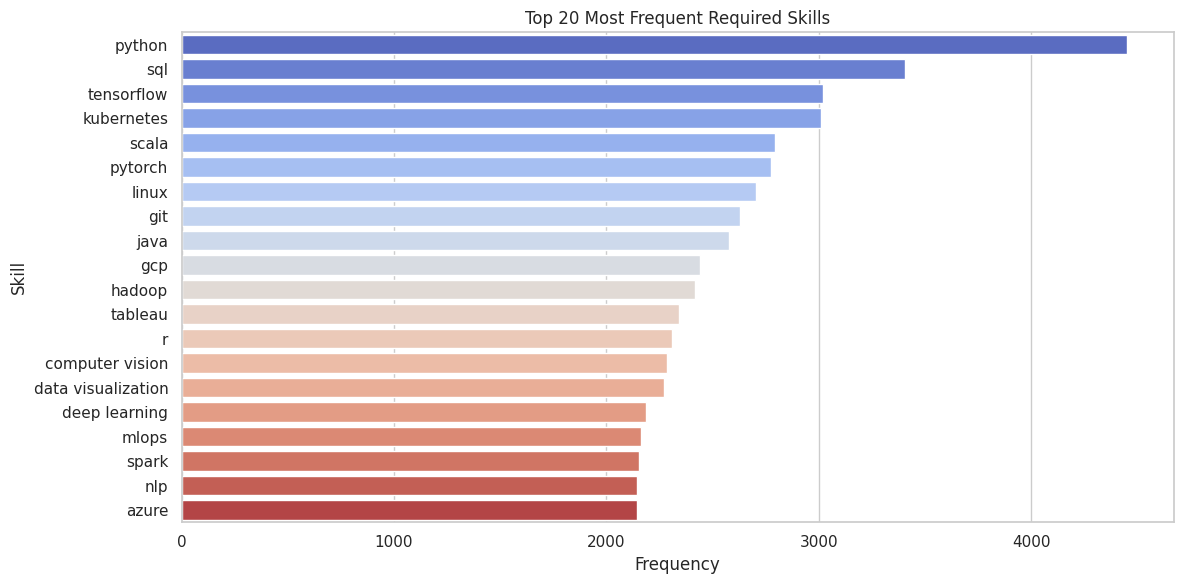

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_skills, x='Frequency', y='Skill', palette='coolwarm')
plt.title("Top 20 Most Frequent Required Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

---

#  AI Job Salary & Role Prediction –  Project Summary

**Dataset:** `ai_job_dataset.csv`
**Samples:** 15,000 rows • **Features:** 19 columns
**Language:** Python
**Objectives:**

* Predict AI job salaries based on features
* Classify job types (e.g. remote/hybrid/on-site)
* Analyze job requirements using NLP

---

##  Step-by-Step Workflow Overview

###  **STEP 1 – Dataset Overview & Cleaning**

* Successfully loaded a clean dataset with 15,000 rows and 19 columns.
* No missing values detected.
* Converted `posting_date` and `application_deadline` to datetime format.
* Normalized all categorical fields (lowercase + whitespace stripping).

---

###  **STEP 2 – Feature Preparation**

* Dropped irrelevant fields such as `job_id`, `company_name`, `posting_date`.
* Encoded categorical columns using `LabelEncoder`.
* Target variable selected: `salary_usd`.
* Final shape for modeling:

  * Feature matrix (`X`): 14 columns
  * Target vector (`y`): salary\_usd

---

###  **STEP 3 – Exploratory Data Analysis (EDA)**

Created powerful visualizations to identify patterns and trends:

* Salary distribution (histogram)
* Salary comparison by:

  * Experience level
  * Employment type
  * Remote ratio
  * Company size
* Top 10 most frequent industries
Bivarate Analysis----

 **Key Insights:**

* Executives earn significantly more than juniors.
* Remote roles have broader salary ranges.
* Large companies offer higher average salaries than small ones.

---

###  **STEP 4 – Feature Engineering**

* All categorical features encoded numerically.
* Used `StandardScaler` for feature normalization.
* Prepared datasets for machine learning (X, y split).

---

###  **STEP 5 – Salary Prediction Using Regression**

Trained 3 different models to predict `salary_usd`:

1. **Linear Regression:**

2. **Random Forest Regressor:**

3. **XGBoost Regressor:**

 **Conclusion:** XGBoost is the most accurate model for salary prediction in this dataset.

---

###  **STEP 6 – Visual Model Comparison**

* Plotted model performance metrics:

  * **R² Score**
  * **MAE (Mean Absolute Error)**
  * **RMSE (Root Mean Squared Error)**
* XGBoost clearly outperformed both Linear Regression and Random Forest in all metrics.

---

###  **STEP 7 – Classification: Predicting Remote Work Type**

Target: `remote_ratio` (0 = On-site, 50 = Hybrid, 100 = Remote)

Models Used:

* Logistic Regression
* Random Forest Classifier

 **Result:**
Both models only achieved \~33% accuracy.
This indicates that the current features are **not strong predictors** for remote status.

---

###  **STEP 8 – NLP Analysis of `required_skills`**

* Tokenized skills using `CountVectorizer` (split by comma).
* Counted and visualized the top 20 most frequent skills.

 **Top Skills Identified:**

* Python, SQL, TensorFlow, Docker, AWS, Linux, Kubernetes, NLP

This step sets the foundation for building a **Employee salary Prediction system**.

---

# Thank you
---
